In [156]:
import attr
import torch
import pandas as pd
import matplotlib.pyplot as plt 

@attr.s(auto_attribs=True)
class Individual:
    """Represents an individual in a population."""
    haplotypes: torch.Tensor  # Shape: (ploidy, n_chromosomes, n_loci_per_chr)
    phenotype: torch.Tensor = None
    genetic_values: torch.Tensor = None
    sex: str = None
    id: int = None
    mother_id: int = None
    father_id: int = None

    @property
    def allele_dosage(self):
        """Calculates the allele dosage from the haplotypes."""
        return self.haplotypes.sum(dim=0)  # Sum across the ploidy dimension


@attr.s(auto_attribs=True)
class Population:
    """Manages a collection of individuals."""
    individuals: list[Individual] = attr.Factory(list)
    sim_param: 'SimParam' = None

    def __len__(self):
        return len(self.individuals)
    
    def generate_random_founders(self, n_founders: int):
        """Generates a founder population with random haplotypes."""
        for i in range(n_founders):
            haplotypes = torch.randint(
                0, 2, (self.sim_param.ploidy, self.sim_param.n_chromosomes, self.sim_param.n_loci_per_chr)
            )
            individual = Individual(haplotypes=haplotypes, id=i + 1)
            self.individuals.append(individual)

@attr.s(auto_attribs=True)
class Trait:
    """Defines parameters for a trait."""
    mean: float
    variance: float
    n_qtl_per_chr: int 
    qtl_effects: torch.Tensor = None
    qtl_locations: torch.Tensor = None

    def generate_qtl_effects(self, n_chromosomes, ploidy,  n_loci_per_chr):
        """Generates QTL effects and their locations."""
        self.qtl_effects = torch.randn(self.n_qtl_per_chr * n_chromosomes) * torch.sqrt(torch.tensor(self.variance))
        
        qtl_locations = []
        for _ in range(n_chromosomes):
            for _ in range(ploidy):
                qtl_locations.append(torch.randperm(n_loci_per_chr)[:self.n_qtl_per_chr])
                
        self.qtl_locations = torch.stack(qtl_locations).view(n_chromosomes, ploidy, self.n_qtl_per_chr)


@attr.s(auto_attribs=True)
class SimParam:
    """Stores global simulation parameters."""
    n_chromosomes: int = 10
    ploidy: int = 2
    traits: list[Trait] = attr.Factory(list)
    n_loci_per_chr: int = 100
    # ... (Other simulation parameters)

    def add_trait_A(self, mean: float, variance: float, n_qtl_per_chr: int):
        """Creates an additive trait and adds it to the simulation."""
        trait = Trait(mean=mean, variance=variance, n_qtl_per_chr=n_qtl_per_chr)
        trait.generate_qtl_effects(self.n_chromosomes, self.ploidy,  self.n_loci_per_chr) # Access SimParam attributes within the method
        self.traits.append(trait) 

# Simulation parameters
sim_param = SimParam(n_chromosomes=2, n_loci_per_chr=100, ploidy=4) # Create a population
population = Population(sim_param=sim_param)
# Generate 100 founders with 1000 loci per chromosome
population.generate_random_founders(n_founders=100)
# Generate Trait
# Add a trait 
sim_param.add_trait_A(mean=1.0, variance=1.0, n_qtl_per_chr=1)

# Accessing an individual:
individual = population.individuals[0]
# Accessing allele_dosage of an individual:
haplotype = individual.haplotypes
genotype = individual.allele_dosage
sim_param.traits[0].qtl_locations

tensor([[[47],
         [26],
         [85],
         [93]],

        [[28],
         [73],
         [75],
         [35]]])

In [134]:
haplotype.shape

torch.Size([4, 2, 100])

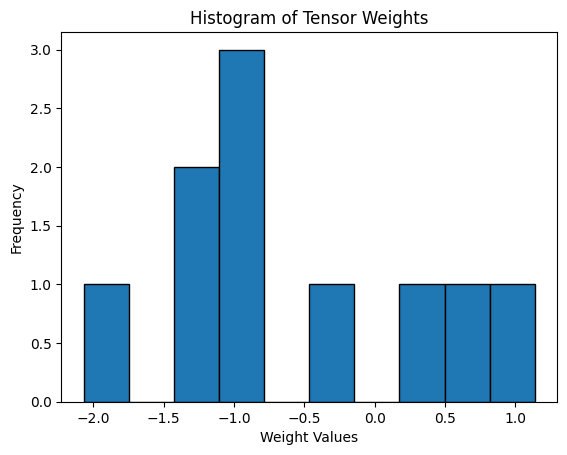

In [47]:
np_array = trait.qtl_effects.numpy()

# Create a histogram
plt.hist(np_array, bins=10, edgecolor='black')

# Add titles and labels
plt.title('Histogram of Tensor Weights')
plt.xlabel('Weight Values')
plt.ylabel('Frequency')

# Show the plot
plt.show()
